# 認識深度學習 - DNN , CNN

• 深度學習就是透過各種神經網路，將一大堆的數據輸入神經網路中，讓電腦透過大量數據的訓練找出規律並自動學習，最後能作出預測。

• 深度學習就是利用電腦模擬人類的大腦：眼睛是輸入層，處理資訊是大腦神經系統，嘴巴是輸出層。

• 深度學習的神經網路是由輸入層、隱藏層和輸出層構成，隱藏層就是處理資訊所在，隱藏層是由神經元構成。


深度神經網路(DNN)
• 神經網路依照隱藏層的不同構造可分為三大類：深度神經網路(DNN)、卷積神經網路(CNN)及遞迴神經網路(RNN)。

• 深度神經網路(DNN)又稱為全連接神經網路，是最基礎的神經網路，卷積神經網路及遞迴神經網路都是深度神經網路的擴充。

• 神經網路是由神經元構成，神經元就像是大腦的神經細胞，是神經網路最基礎的結構，在它們相互結合下，建構整個龐大的運作網路，實現學習、處理及預測等功能。

## 深度神經網路(DNN) 實作

## 使用圖像
我們將使用著名的MNIST 手寫數字數據庫 http://yann.lecun.com/exdb/mnist/ 作為我們的訓練數據集。它由 28 像素 x 28 像素的手寫數字（0 到 9）灰度圖像和每個圖像的標籤組成，指示它代表哪個數字。以下是數據集中的一些示例圖像：

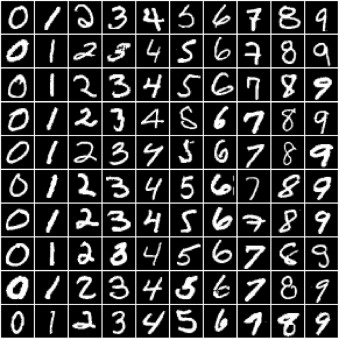

DNN蒐集資料：MNIST資料集

• 資料集是由紐約大學Yann LeCun教授蒐集整理許多人0到9的手寫數字圖片所形成的資料集，其中包含了60000筆的訓練資料，10000筆的測試資料。

• 透過Keras就可以讀取MNIST資料集

## 加載需要模塊

In [ ]:
from keras.datasets import mnist
# 讀入圖片
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 訓練60K與測試10K圖片
print(f'訓練圖片: {len(x_train)}')
print(f'測試圖片: {len(x_test)}')
print(f'訓練圖片維度: {x_train.shape} {y_train.shape}')
print(f'測試圖片維度: {x_test.shape} {y_test.shape}')

# 載入 matplotlib
import matplotlib.pyplot as plt
# 電腦看到的圖
plt.imshow(x_train[0], cmap='gray')

# 實際儲存內容
print(x_train[0][10:20])
plt.imshow(x_train[0][10:20], cmap='gray')

# 人喜歡看到的圖
plt.imshow(x_train[0], cmap='binary')


# @title 畫出25張圖

def show_img(x, y, startid=0):
  plt.figure(figsize=(12,12))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    title = 'y='+str(y[i+startid])
    ax.imshow(x[i+startid], cmap='binary')
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]);ax.set_yticks([])
  plt.show()

show_img(x_train, y_train, 25)

## 資料前置處理

In [ ]:
x_train[0][10:15]

# 標準化, 把數值轉為0-1之間, 只能做一次
x_train, x_test = x_train/255., x_test/255.

x_train[0][10:15]

## 設計神經網路模型

DNN建立模型

• 建立模型語法：

```
from keras.models import Sequential
from keras.layers import Dense

模型變數 = Sequential()
模型變數.add(Dense(units=數值,
       input_dim=數值,
       activation=激勵函式名稱))
```
• 查看權重數量 ：
```
模型變數.summary()
```

### 第一種建立神經網路方法

In [ ]:
# 載入套件
from keras.models import Sequential
from keras.layers import Dense, Flatten

# 設計神經網路結構
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=10, activation='softmax'))
model1.summary()

from keras.utils import plot_model
dot_img_file = 'model1.png'
plot_model(model1, to_file=dot_img_file, show_shapes=True)

### 第二種建立神經網路方法

In [ ]:
model1 = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(units=256, activation='relu'),
  Dense(units=10, activation='softmax')
])
model1.summary()

## 建立卷積神經網路 CNN

In [ ]:
x_train.shape
# 輸入圖片轉成4維
x_trainCNN = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_testCNN = x_test.reshape(10000, 28, 28, 1).astype('float32')
x_trainCNN.shape

建立CNN神經網路架構

In [ ]:
# 載入套件
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential([
  Conv2D(filters=10, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(20, (3,3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
cnn.summary()

dot_img_file = 'cnn.png'
plot_model(cnn, to_file=dot_img_file, show_shapes=True)

## 訓練,編譯,評估及存取模型

• 訓練模型：
```
模型變數.compile(loss=損失函式,
         optimizer=最佳化函式,
         metrics=評估標準)

模型變數.fit(x=特徵值,y=標籤,
       validation_split=驗證資料比率,
       epochs=訓練次數,
       shuffle=布林值,
       batch_size=批次資料數量,
       verbose=顯示模式)
```


### 編譯模型

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
model1.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
cnn.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])

### 訓練模型

In [ ]:
model1.fit(x=x_train, y=y_train,
          validation_split=0.2,
          epochs=10,
          shuffle=True,
          batch_size=200,
          verbose=1)

In [ ]:
cnn.fit(x=x_train, y=y_train,
          validation_split=0.2,
          epochs=10,
          shuffle=True,
          batch_size=200,
          verbose=1)

### 評估(測試)模型

In [ ]:
loss, accuracy = model1.evaluate(x=x_test, y=y_test)
print(f'模型準確度= {accuracy*100:.2f}%')
print(f'模型損失值= {loss:.4f}')

In [ ]:
loss, accuracy = cnn.evaluate(x=x_test, y=y_test)
print(f'模型準確度= {accuracy*100:.2f}%')
print(f'模型損失值= {loss:.4f}')

### 儲存/讀取模型

• 儲存模型：
```
模型變數.save(檔名)
```


• 讀取模型：
```
from keras.models import load_model
模型變數 = load_model(模型檔名)
```

In [ ]:
model1.save('model1.keras')
from keras.models import load_model
model2 = load_model('model1.keras')

In [ ]:
cnn.save('model1.keras')
from keras.models import load_model
cn2 = load_model('cnn.keras')


## 用測試圖片讓模型猜

In [ ]:
# 載入 numpy
import numpy as np
preds = model2.predict(x_test)
preds[0]

y_test[0]

np.argmax(preds[0])

preds = np.argmax(model2.predict(x_test), axis=1)
preds[:20]


# @title 顯示25張預測結果
def drawResult(y_test, preds, startid=0):
  plt.figure(figsize=(12,12))
  for i in range(25):
      ax=plt.subplot(5,5,i+1)
      #顯示AI猜的數字結果
      title='AI='+str(preds[i+startid])+' y='+str(y_test[i+startid])
      if preds[i+startid] == y_test[i+startid]:
        title += '(O)'
      else:
        title += '(X)'
      ax.imshow(x_test[i+startid], cmap=plt.get_cmap('Greys'))
      ax.set_title(title, fontsize=12)
      ax.set_xticks([]);ax.set_yticks([])
  plt.show()
drawResult(y_test, preds, 3000)

In [ ]:
# 載入 numpy
import numpy as np

predsCNN = np.argmax(model2.predict(x_testCNN), axis=1)

drawResult(y_test, predsCNN, 4730)

## 讀取新圖給模型猜


In [ ]:
# 下載10張手寫數字圖片
!gdown '1xyw4-sRThdlU7DhxNCCh7sF8VbLdAS2_' --output imagedata.zip
!unzip imagedata.zip

### 讀入圖檔

In [ ]:
# 載入 cv2,glob
import cv2, glob
# 找出有.jpg檔案的資料
files = glob.glob('/content/imagedata/*.jpg')
files

img = cv2.imread('/content/imagedata/6.jpg')
plt.imshow(img)

img.shape

img[0][10:20]

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

img.shape

img = 255 - img
plt.imshow(img, cmap='gray')
img = cv2.resize(img, (28,28))
plt.imshow(img, cmap='gray')

files[0]
files[0].split('/')[-1].split('.')
files[0].split('/')[-1].split('.')[0]

In [ ]:
x_new = []
y_new = []
for f in files:
  img = cv2.imread(f)
  # 圖片轉灰階
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # 黑白反向
  img = 255 - img
  # 調整大小
  img = cv2.resize(img, (28,28))
  x_new.append(img)
  y_new.append(int(f.split('/')[-1].split('.')[0])) #記得轉成數值
# 查詢總共讀入張數
len(x_new)
y_new

# 轉為numpy array
x_new, y_new = np
# 查看圖片維度
print(f'新的圖片維度 {x_new.shape} {y_new.shape}')

# 標準化 (只能做一次)
x_new = x_new/255.

# 用模型來預測
predicts = np.argmax(model2.predict(x_new), axis=1)
predicts

# CNN　猜猜看
x_newCNN = x_new.reshape(len(x_new), 28, 28, 1).astype('float32')
preds_cnn = np.argmax(cnn2.predict(x_newCNN), axis=1)
preds_cnn

# 用模型來預測
print('實際圖檔  =',y_new)
print('MLP 猜的結果 =',predicts)
print('CNN 猜的結果 =',preds_cnn)

## 畫出猜的結果

In [ ]:
def show_results(images, labels, predicts, startid, n=10):
  plt.figure(figsize=(12,12))
  if n > 25:
    n=25

  for i in range(n):
      ax=plt.subplot(5,5,i+1)
      #顯示AI猜的數字結果
      title='AI='+str(predicts[i])+' y='+str(labels[i])
      if labels[i] == predicts[i]:
        title += '(O)'
      else:
        title += '(X)'
      ax.imshow(images[i], cmap=plt.get_cmap('Greys'))
      ax.set_title(title, fontsize=12)
      ax.set_xticks([]);ax.set_yticks([])
  plt.show()

In [ ]:
show_results(x_new, y_new, predicts, 0, 10)

In [ ]:
show_results(x_new, y_new, preds_cnn, 0, 10)

In [ ]:
# 用模型來預測
print('實際圖檔  =',y_new)
print('MLP 猜的結果 =',predicts)
print('CNN 猜的結果 =',preds_cnn)

### 評估模型

In [ ]:
loss1, acc1 = model1.evaluate(x=x_new, y=y_new)
print(f'MLP模型準確度= {acc1*100:.2f}%')
print(f'MLP模型損失值= {loss1:.4f}')
loss2, acc2 = cnn.evaluate(x=x_newCNN, y=y_new)
print(f'CNN模型準確度= {acc2*100:.2f}%')
print(f'CNN模型損失值= {loss2:.4f}')